# KNN regression model

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the recquired packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split  
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error 
from math import sqrt
from numpy.random import seed

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
seed(1)

### Loading the data into the dataframe

In [4]:
df_md = pd.read_csv("/content/drive/My Drive/CSV Files/Std_mdb.csv", index_col=[0])

In [5]:
df_md.drop(['sealevel','avgT','maxT','minT','slp','avgRH','PP','avgW','VM','CO2_percapita'], axis = 1 ,inplace=True)

### Splitting the data into training and testing sets

In [6]:
train , test = train_test_split(df_md, test_size = 0.20,random_state = 0)

In [7]:
x_train = train.drop('Std_sealevel', axis=1)
y_train = train['Std_sealevel']

x_test = test.drop('Std_sealevel', axis=1)
y_test = test['Std_sealevel']

###Implementing GridsearchCV to determine the optimum value of k 

In [8]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params)
model.fit(x_train,y_train)
model.best_params_

{'n_neighbors': 7}

In [10]:
type(model.best_params_)
keys, values = zip(*model.best_params_.items()) 
print ("keys : ", str(keys)) 
print ("values : ", str(values)) 
type(values)
k_opt = int(''.join(map(str, values))) 


keys :  ('n_neighbors',)
values :  (7,)


### Fitting the model

In [11]:
knn = neighbors.KNeighborsRegressor(n_neighbors=k_opt, weights= 'distance')
knn.fit(x_train, y_train)

### Utilizing the model to generate predictions

In [15]:
predict = knn.predict(x_test)

### Calculating the r-squared, adjusted r-squared and the RMSE of the model

In [12]:
r21 = r2_score(y_test,predict).round(3)
print(f"The r-squared value of the new fit is", r21)
p = len(x_train.columns) 
n = len(x_train)
r21_adj = 1 - ((1-r21) * (n-1) / (n-p-1))
rms = sqrt(mean_squared_error(y_test, predict))
print(f"The adjusted r-squared value of the new fit is", r21_adj)
print(f'The RMSE value of the fit is',rms)

The r-squared value of the new fit is 0.86
The adjusted r-squared value of the new fit is 0.8583625730994152
The RMSE value of the fit is 0.00470018141145316


### Diagnostic Plots 

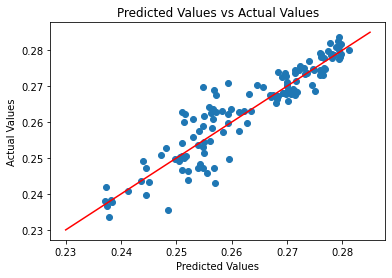

In [16]:
plt.scatter(predict,y_test)
x = np.linspace(0.23,0.285,1000)
plt.plot(x,x, linestyle = 'solid', color = "red")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted Values vs Actual Values")
plt.show()


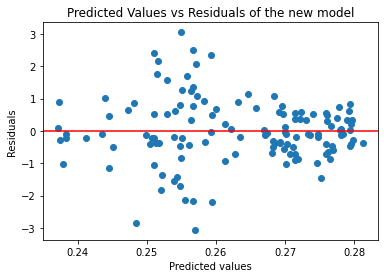

In [14]:
res = y_test - predict
res_stand = (res - res.mean())/res.std()
plt.scatter(predict, res_stand )
plt.axhline(y = 0, color = 'red' )
plt.title("Predicted Values vs Residuals of the new model")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()